# GROUP ASSIGNMENT 

<pre>
- Siebren Barten   (.......)
- Puck de Bruin    (1665650)
- Jette Bruurs     (1746774)
- Jilke Nooijen    (1712616)
- Silke Peters     (.......)
- Lyonne Vlaar     (.......)
- Marijn ter Weeme (.......)

First, install packages

In [7]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split

Read cvs files

In [8]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [9]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


In [10]:
df_untested=pd.read_csv("untested_molecules.csv")
SMILES_untested=df_untested['SMILES']

In [11]:
df= df1.append(df2,ignore_index=True)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. 

In [12]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])
Mol_descriptors_untested, desc_names_untested = RDkit_descriptors(df_untested['SMILES'])#geeft error

In [16]:
df_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_descriptors_untested = pd.DataFrame(Mol_descriptors_untested, columns=desc_names_untested)
df_descriptors_untested

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.419814,13.419814,1.031891,-4.603365,0.349176,379.504,350.272,379.225977,148,0,...,0,0,0,0,0,0,0,0,0,0
1,14.015460,14.015460,0.531163,-6.494821,0.664725,442.537,416.329,442.156243,164,0,...,0,1,0,0,0,0,0,0,0,0
2,14.007780,14.007780,0.481963,-3.900763,0.499889,359.313,345.201,359.091749,134,0,...,0,0,0,0,0,0,0,0,0,0
3,12.733616,12.733616,0.757694,-3.989685,0.247581,358.374,338.214,358.139747,136,0,...,0,0,0,0,0,0,0,0,0,0
4,13.222851,13.222851,0.458763,-5.338708,0.376568,334.729,320.617,334.080823,120,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12.414049,12.414049,0.175145,-3.606342,0.648660,210.237,196.125,210.111676,82,0,...,0,0,0,0,0,0,0,0,0,0
9996,13.892880,13.892880,1.067221,-5.388921,0.323364,464.519,432.263,464.227099,182,0,...,0,0,0,0,0,0,0,0,0,0
9997,13.885132,13.885132,0.217513,-6.216018,0.460041,444.538,424.378,444.092597,156,0,...,1,1,0,0,0,0,0,0,0,0
9998,8.161291,8.161291,1.123413,-4.762543,0.665075,302.822,277.622,302.151748,114,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
correlation_matrix = df_descriptors.corr().abs()
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
df_filtered = df_descriptors.drop(columns=highly_correlated_columns)
df_untested_filtered=df_descriptors_untested.drop(columns=highly_correlated_columns)# moeten dit per definitie dezelfde zijn


In [18]:
unique_descriptors = df_filtered.nunique()
col_to_drop = unique_descriptors[unique_descriptors== 1].index
df_filtered=df_filtered.drop(col_to_drop, axis=1)
df_untested_filtered=df_untested_filtered.drop(col_to_drop, axis=1)

In [19]:
df_merged = df.join(df_filtered)
df_merged_untested=df_untested_filtered.join(df_untested)

In [20]:
data_missing=df_merged.isnull()
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


In [21]:
df_duplicate = df_merged[df_merged.duplicated()]
if len(df_duplicate)==0:
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))
df_without_duplicates=df_merged.drop_duplicates()
df_untested_filtered=df_merged_untested.drop_duplicates()

The amount of duplicated rows is 25


In [22]:
label=df_without_duplicates["ALDH1_inhibition"]
SMILES=df_without_duplicates["SMILES"]
print(SMILES)
#df_merged=df_merged.set_index("SMILES")#ik twijfel ofdat dit een goed idee is

0       COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...
1                  O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1
2       Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...
3                       CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1
4       CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21
                              ...                        
1995                      C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1
1996                       COC(=O)c1c(NC(C)=O)sc2c1CCCCC2
1997                              O=C(CCl)NC1CCCc2ccccc21
1998      COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1
1999    COc1ccc(NC(=O)C2CCC(N3C(=O)C4C5C=CC(C5)C4C3=O)...
Name: SMILES, Length: 1975, dtype: object


Scale the data with MinMax scaling

In [23]:
#inhib=df_merged["ALDH1_inhibition"]#werkt niet want hij heeft SMILES als index
df_without_label=df_without_duplicates.drop("ALDH1_inhibition",axis=1) #moeten we hier niet ook smiles droppen
df_without_label=df_without_label.drop("SMILES",axis=1)
desc_names=list(df_without_label.columns.values)
df_without_label

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,10.907235,-0.245747,...,0,0,0,0,0,1,0,0,0,0
1,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,11.297748,-0.166571,...,0,1,0,0,0,0,0,0,0,0
2,10.154031,0.626646,-5.536518,0.382043,477.589,0.348615,-0.492903,1.485714,10.160364,-0.247542,...,1,0,0,0,0,1,0,0,0,0
3,11.964559,0.338689,-3.767788,0.795948,330.609,0.351723,-0.421732,1.555556,11.220549,-0.249006,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,0.107779,-5.727217,0.687618,419.553,0.231765,-0.301646,1.518519,12.204811,-0.242674,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,0.017897,-3.332878,0.492481,251.330,0.192599,-0.331334,1.705882,10.971568,-0.243604,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,0.210081,-3.948066,0.661884,267.350,0.340670,-0.465332,1.444444,10.106796,-0.245746,...,0,0,0,0,0,0,0,0,1,0
1997,12.223679,0.646387,-3.783460,0.767040,223.703,0.234904,-0.348256,1.866667,9.968710,-0.186025,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,0.366586,-4.404360,0.561228,423.542,0.232788,-0.496766,1.400000,10.910674,-0.246290,...,0,1,0,0,0,0,0,0,0,0


In [24]:
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_without_label)
df_minmax = pd.DataFrame(df_minmax, columns=desc_names)
display(df_minmax)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,0.872370,0.018185,0.374411,0.492906,0.689213,0.391821,0.468063,0.441894,0.308558,0.000293,...,0.00,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.741976,0.078075,0.576463,0.466743,0.502704,0.355044,0.503933,0.407407,0.319482,0.006842,...,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473174,0.188548,0.310716,0.326910,0.720005,0.577908,0.472483,0.528920,0.287666,0.000145,...,0.25,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,0.633976,0.101902,0.535150,0.823627,0.397819,0.583765,0.560515,0.566396,0.317322,0.000024,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.723335,0.032421,0.286518,0.693622,0.592788,0.357705,0.709049,0.546522,0.344855,0.000547,...,0.00,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,0.787319,0.005376,0.590336,0.459444,0.224037,0.283897,0.672329,0.647059,0.310357,0.000470,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.708102,0.063204,0.512275,0.662740,0.259153,0.562935,0.506586,0.506775,0.286167,0.000293,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
1972,0.656990,0.194487,0.533162,0.788935,0.163478,0.363622,0.651397,0.733333,0.282304,0.005233,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.824579,0.110296,0.454376,0.541945,0.601532,0.359633,0.467705,0.482927,0.308654,0.000248,...,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determine how many principal components are needed for the analysis

,0
1,0.181294
2,0.263172
3,0.313574
4,0.358752
5,0.399052
...,...
154,1.000000
155,1.000000
156,1.000000
157,1.000000


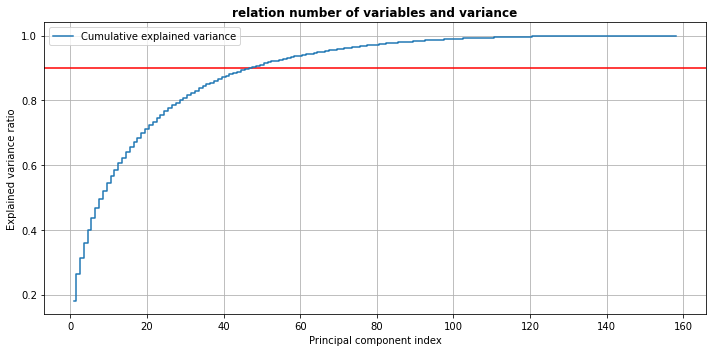

48


In [25]:
pca = PCA()

# Determine transformed features
df_pca = pca.fit_transform(df_minmax)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
#plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('relation number of variables and variance', fontweight = 'bold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#print point where variance is first above 0.9 
for i in range(1,len(df_cum_sum)): 
    if df_cum_sum[0][i] >= 0.9: 
        number_of_variables = df_cum_sum[0].index[i]
        print(number_of_variables)
        break

Find out what how relevant the features are for the PC's 

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
MaxAbsEStateIndex,0.211475,0.112086,0.040075,0.011918,0.177325,0.111097,0.057996,0.173797,0.021361,0.153373,...,0.072887,0.055610,0.085175,0.245469,0.052871,0.122311,0.237648,0.027776,0.241262,0.124578
MinAbsEStateIndex,0.090358,0.083054,0.034504,0.077521,0.010669,0.061163,0.040402,0.014735,0.048585,0.062488,...,0.067258,0.216607,0.062336,0.027684,0.028985,0.024564,0.084294,0.039060,0.068207,0.065700
MinEStateIndex,0.206700,0.005749,0.030181,0.059242,0.023701,0.013260,0.208143,0.146078,0.154416,0.012566,...,0.019363,0.130638,0.072251,0.036751,0.058754,0.006096,0.002175,0.001167,0.112587,0.148011
qed,0.041089,0.174396,0.012665,0.021972,0.034500,0.055496,0.144710,0.154391,0.015071,0.256301,...,0.077267,0.208614,0.171647,0.024379,0.030943,0.039907,0.281547,0.121986,0.096012,0.011752
MolWt,0.163015,0.232595,0.007178,0.010244,0.061218,0.105903,0.093307,0.042517,0.047874,0.003865,...,0.032192,0.014343,0.023449,0.004528,0.013831,0.007599,0.062299,0.017561,0.014145,0.044317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_tetrazole,0.007717,0.022979,0.042093,0.019922,0.018329,0.008794,0.001766,0.004711,0.020048,0.060332,...,0.169276,0.044607,0.058301,0.066445,0.149589,0.003605,0.046716,0.019983,0.041250,0.084876
fr_thiazole,0.030850,0.023056,0.049469,0.064415,0.051844,0.031013,0.041622,0.156448,0.068085,0.090069,...,0.022718,0.114524,0.013592,0.074713,0.010401,0.027869,0.001974,0.069785,0.007722,0.093970
fr_thiocyan,0.000531,0.001808,0.000038,0.000064,0.000109,0.000755,0.000814,0.001839,0.001422,0.002617,...,0.002772,0.000636,0.009331,0.001141,0.004758,0.009779,0.002317,0.003139,0.001337,0.000162
fr_thiophene,0.005659,0.012847,0.088997,0.023574,0.061921,0.004880,0.010621,0.105698,0.022190,0.146717,...,0.052222,0.055609,0.162819,0.049935,0.001385,0.023983,0.027362,0.032122,0.028965,0.106205


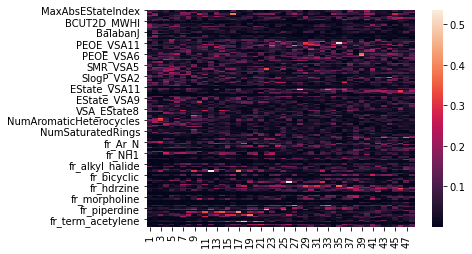

In [26]:
n_components = number_of_variables
pca = PCA(n_components = n_components)
components = pca.fit_transform(df_minmax)
df_pc = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()
display(df_pc)

sn.heatmap(df_pc, annot=False)
plt.show()


Evaluate which features are important per PC

In [ ]:
"""threshold = 0.21
percentage = 95

df_high_value = df_pc[df_pc > threshold]

df_evaluate = df_high_value.transpose()

def show_missing(df):
    "Return a Pandas dataframe describing the contents of a source dataframe including missing values."
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

df_missing = show_missing(df_evaluate)
display(df_missing)

df_missing.drop(df_missing[df_missing['pc_missing'] >= percentage ].index, inplace = True)
df_possible_desc = df_high_value.iloc[df_missing.index,]
display(df_possible_desc)
# df_possible_desc.sum(axis=0)"""

In the variable merged_df_incl_label, merged_df is displayed and the variable named label is added. In this way there is a dataframe with the ALDH1_inhibition column and the other columns so it is possible to split on the ALDH1_inhibition characteristic. 

In [27]:
"""
werkt nog niet
pca = PCA(n_components=48)
component_names = [f"PC{i+1}" for i in range(48)]
pca.fit(df_minmax)
transformed_data=pca.transform(df_minmax)
df_scores=pd.DataFrame(data=transformed_data,columns=component_names).iloc[:,:2]
inhibition=df["ALDH1_inhibition"]
df_scores["ALDH1_inhibition"]=inhibition

inh0_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC1"]
inh0_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC2"]
inh1_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC1"]
inh1_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC2"]

ax.scatter(inh0_PC1, inh0_PC2, c="blue",label="0");
ax.scatter(inh1_PC1, inh1_PC2, c="orange",label="1");"""

In [28]:
minmax_with_label = df_minmax.join(label) #dit word nu onnodig
df_full=minmax_with_label.join(SMILES)

Split the data in test data and trainings data with a ratio of 80% trainings data and 20% test data. 

In [29]:
y = label
X = df_minmax
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Apply KNN

29


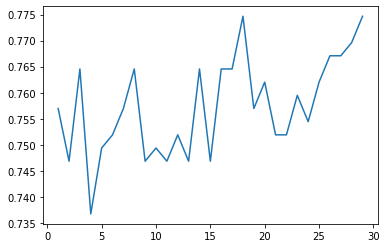

In [33]:
k_range = range(1,30)
scores = []
highest_value = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    scores.append(accuracy)
    if accuracy >= highest_value:
        highest_value = accuracy
        optimal_k = k


plt.plot(k_range, scores);
print(optimal_k)

In [34]:
neighbours = KNeighborsClassifier(n_neighbors=optimal_k)
neighbours.fit(X_train, y_train)
y_pred = neighbours.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7746835443037975